In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
#check the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#count null value
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Replaces all occurrences of the value 0 this columns,with NaN (Not a Number), which is a special floating-point value used to represent missing or undefined data.

In [7]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
#"Check again and count the null values. This time, it might be different from the previous count.
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

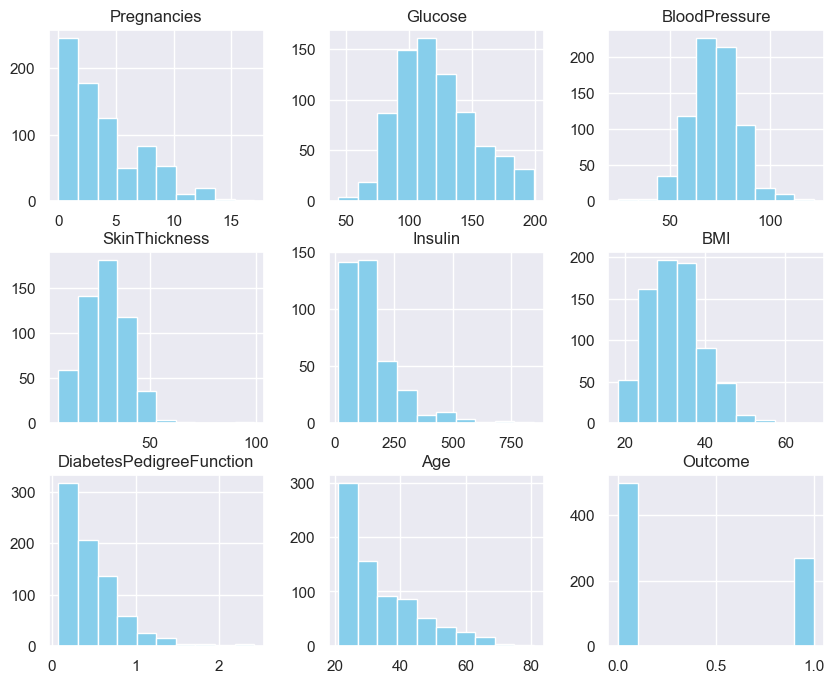

In [9]:
data.hist(figsize=(10, 8), color="skyblue")


Handling missing values with mean 

In [10]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].mean(), inplace = True)
data['Insulin'].fillna(data['Insulin'].mean(), inplace = True)
data['BMI'].fillna(data['BMI'].mean(), inplace = True)

In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


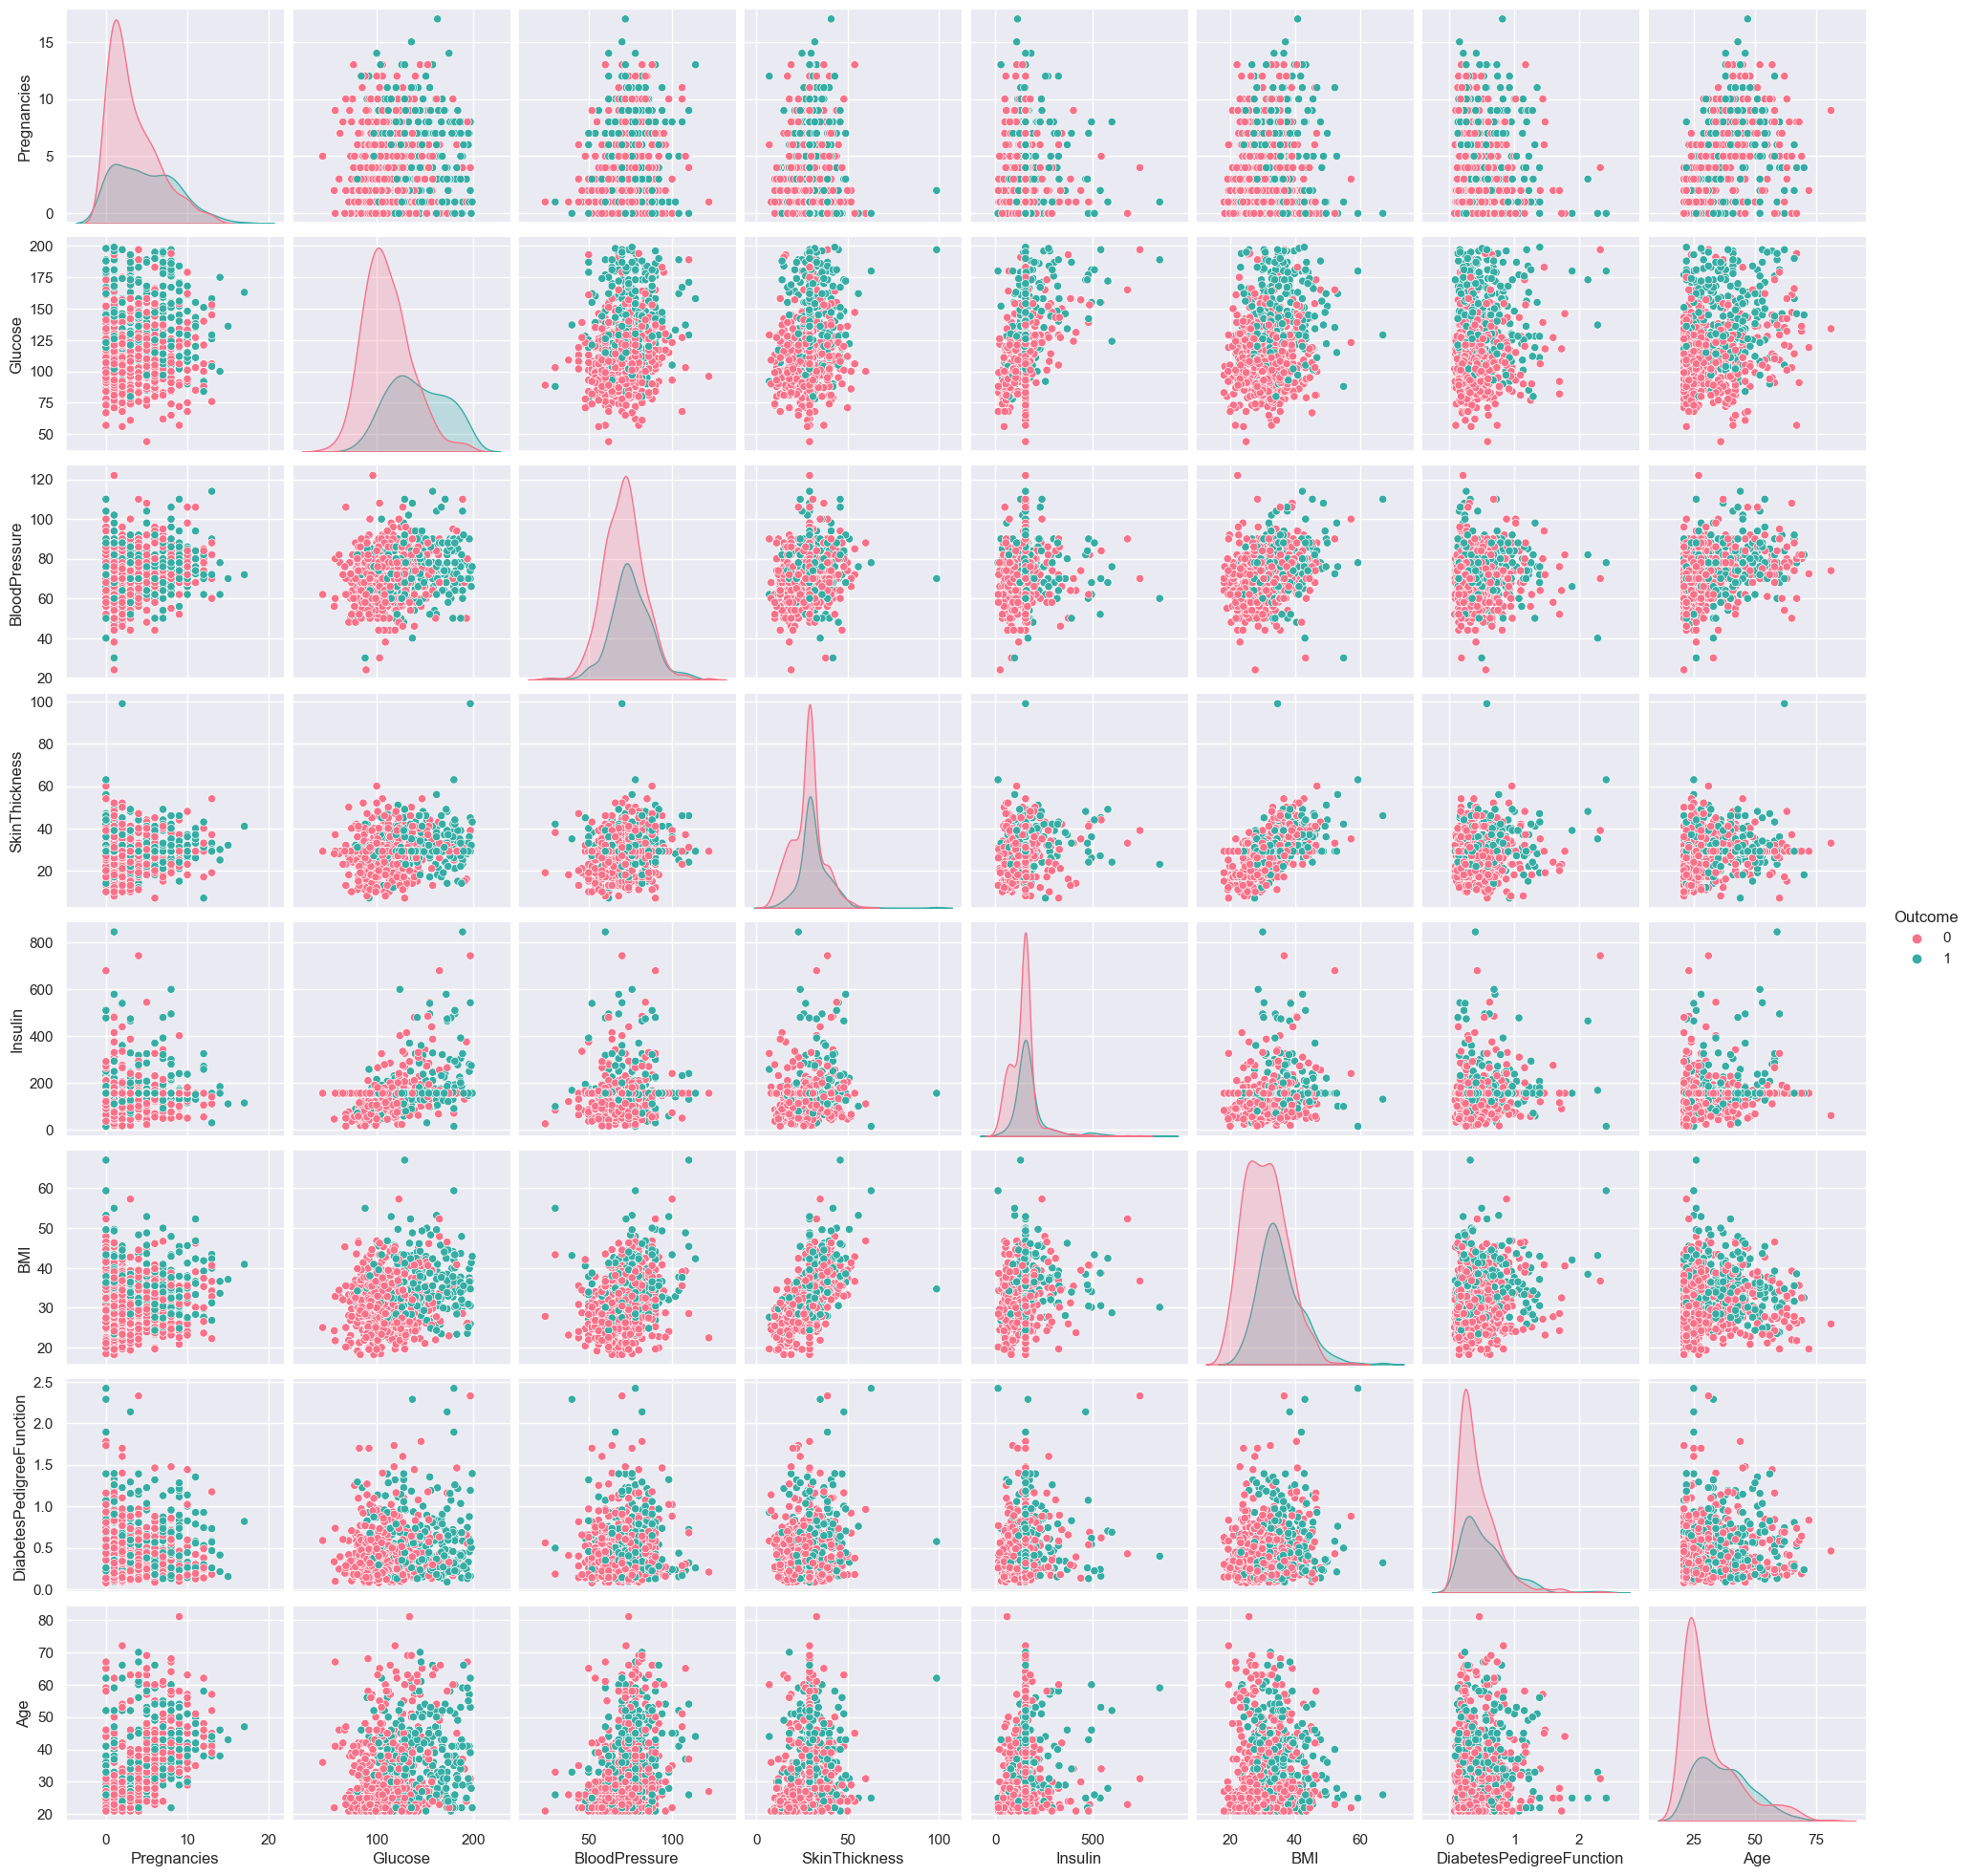

In [13]:
sn.pairplot(data, hue='Outcome', palette='husl')

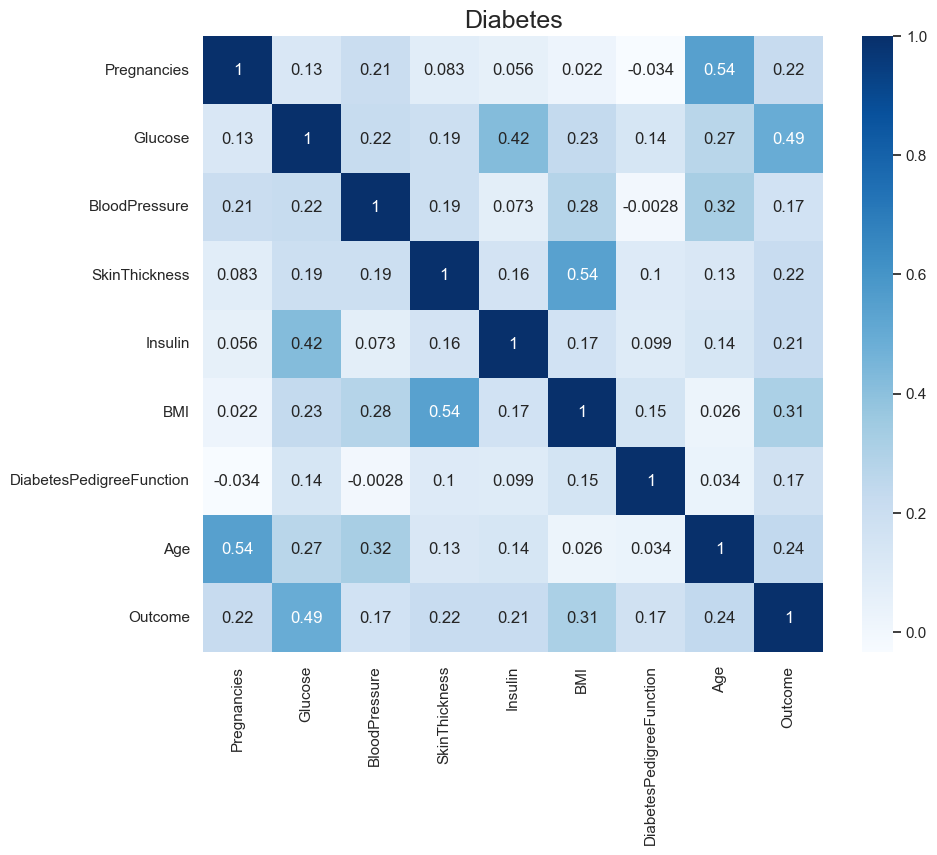

In [14]:
plt.figure(figsize=(10,8))
sn.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title("Diabetes",fontsize=18)
plt.show()


In [15]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Train_test_split

In [16]:
X = data.drop(['Outcome'],axis=1)
y = data['Outcome']

Preprocessing with feature Scaling 

In [17]:
ss= StandardScaler()
X_scaled= ss.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=0)

In [19]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((691, 8), (691,), (77, 8), (77,))

#    LinearRegression

In [20]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred=LR.predict(X_test)

In [21]:
LR.score(X_test, y_test)

0.4117497747104637

#    LogisticRegression

In [22]:
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

In [23]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [24]:
X_test

array([[-8.44885053e-01,  2.54185013e+00,  2.97375623e-01,
         1.57612279e+00, -3.34507888e-16,  1.51987076e+00,
         2.78492300e+00, -9.56461683e-01],
       [-5.47918591e-01, -4.82861037e-01,  1.31928692e-01,
         9.63642021e-02, -6.53772038e-01,  1.66291742e-01,
        -2.04994488e-01, -8.71373930e-01],
       [ 4.60143347e-02, -1.50205719e+00, -8.60752896e-01,
         8.08793628e-16, -3.34507888e-16,  2.24510195e-01,
        -2.44256030e-01, -7.01198424e-01],
       [ 3.42980797e-01,  1.45689939e+00, -3.35182392e-02,
        -1.15573922e+00,  2.28936713e-01, -9.68968082e-01,
         3.47687230e-01,  1.51108316e+00],
       [-1.14185152e+00, -3.51351855e-01, -6.12582499e-01,
         8.08793628e-16, -3.34507888e-16, -1.14362344e+00,
         5.68155894e-01, -1.90671905e-01],
       [-8.44885053e-01, -1.33767071e+00, -3.35182392e-02,
        -1.26956680e+00, -1.35993904e+00, -8.52531177e-01,
        -5.70428848e-01, -7.86286177e-01],
       [ 1.53084665e+00,  9.966172

In [25]:
log.score(X_test, y_test)

0.8571428571428571

In [26]:
con = confusion_matrix(y_test, y_pred)
con

array([[47,  4],
       [ 7, 19]])

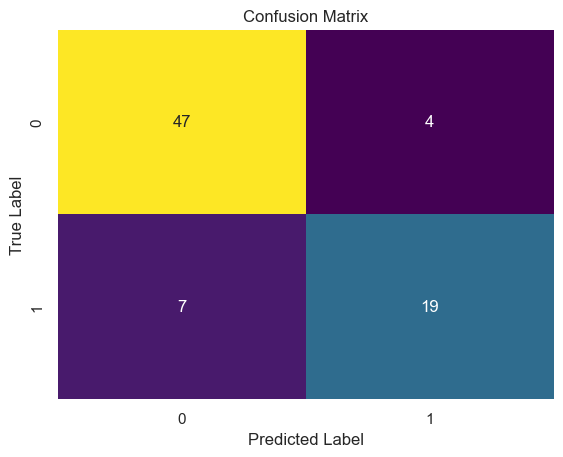

In [27]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

sn.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [28]:
accuracy_score(y_pred, y_test)

0.8571428571428571

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90        51
           1       0.83      0.73      0.78        26

    accuracy                           0.86        77
   macro avg       0.85      0.83      0.84        77
weighted avg       0.86      0.86      0.85        77



### Logistic Regression accuracy_score is 0.86

#    DecisionTree

In [30]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [31]:
y_pred = tree.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.6623376623376623

In [33]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80        77
           1       0.00      0.00      0.00         0

    accuracy                           0.66        77
   macro avg       0.50      0.33      0.40        77
weighted avg       1.00      0.66      0.80        77



In [34]:
pd.Series(tree.feature_importances_, index=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']).sort_values(ascending=False)

Glucose                     0.619553
BMI                         0.260940
Age                         0.119507
Pregnancies                 0.000000
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
DiabetesPedigreeFunction    0.000000
dtype: float64

### Decision Tree accuracy_score is 0.66

#    RandomForest

In [35]:
random_forest = RandomForestClassifier( random_state=1,max_depth=3,n_estimators=100,oob_score=True,n_jobs=-1)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [36]:
X_test

array([[-8.44885053e-01,  2.54185013e+00,  2.97375623e-01,
         1.57612279e+00, -3.34507888e-16,  1.51987076e+00,
         2.78492300e+00, -9.56461683e-01],
       [-5.47918591e-01, -4.82861037e-01,  1.31928692e-01,
         9.63642021e-02, -6.53772038e-01,  1.66291742e-01,
        -2.04994488e-01, -8.71373930e-01],
       [ 4.60143347e-02, -1.50205719e+00, -8.60752896e-01,
         8.08793628e-16, -3.34507888e-16,  2.24510195e-01,
        -2.44256030e-01, -7.01198424e-01],
       [ 3.42980797e-01,  1.45689939e+00, -3.35182392e-02,
        -1.15573922e+00,  2.28936713e-01, -9.68968082e-01,
         3.47687230e-01,  1.51108316e+00],
       [-1.14185152e+00, -3.51351855e-01, -6.12582499e-01,
         8.08793628e-16, -3.34507888e-16, -1.14362344e+00,
         5.68155894e-01, -1.90671905e-01],
       [-8.44885053e-01, -1.33767071e+00, -3.35182392e-02,
        -1.26956680e+00, -1.35993904e+00, -8.52531177e-01,
        -5.70428848e-01, -7.86286177e-01],
       [ 1.53084665e+00,  9.966172

In [37]:
con1 = confusion_matrix(y_pred, y_test)
con1

array([[47, 10],
       [ 4, 16]])

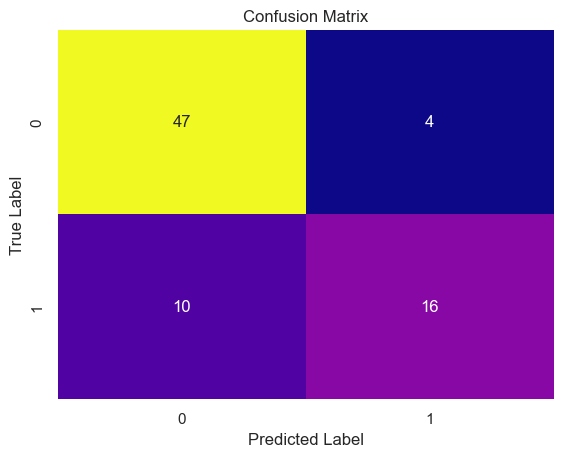

In [38]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

sn.heatmap(cm, annot=True, fmt="d", cmap="plasma", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [39]:
accuracy_score(y_pred, y_test)

0.8181818181818182

In [40]:
pd.Series(random_forest.feature_importances_, index=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']).sort_values(ascending=False)

Glucose                     0.328186
BMI                         0.197268
Age                         0.173699
Insulin                     0.093036
Pregnancies                 0.075774
DiabetesPedigreeFunction    0.069616
SkinThickness               0.047869
BloodPressure               0.014553
dtype: float64

In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        57
           1       0.62      0.80      0.70        20

    accuracy                           0.82        77
   macro avg       0.77      0.81      0.78        77
weighted avg       0.84      0.82      0.82        77



### Random Forest accuracy_score is 0.8182

#    GridSearchCV

In [42]:
rf = RandomForestClassifier(random_state=1,n_jobs=-1)
params = {
    'max_depth':[1,2,3],
    'min_samples_leaf':[1,2,3],
    'n_estimators':[1,2,3,98,99,100]
}
grid_search = GridSearchCV (estimator=rf, param_grid= params, cv=3,n_jobs=-1,verbose=1,scoring="accuracy")
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [1, 2, 3, 98, 99, 100]},
             scoring='accuracy', verbose=1)

In [43]:
grid_search.best_score_

0.758322353974528

In [44]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=3, n_estimators=3,
                       n_jobs=-1, random_state=1)

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [46]:
X_train

array([[ 0.63994726,  1.06237184,  0.13192869, ..., -0.45955662,
         1.10875714,  0.49003012],
       [ 0.04601433, -1.27191612,  1.12461028, ..., -0.45955662,
        -0.46774481,  0.06459135],
       [-0.84488505, -0.81163399, -0.19896517, ...,  0.82124933,
        -0.76673656, -0.27575966],
       ...,
       [ 0.04601433, -0.91026588, -0.6125825 , ..., -1.12906883,
        -0.97814487, -1.04154944],
       [ 2.12477957, -1.20616153,  0.13192869, ..., -0.34311972,
        -0.51908683,  0.14967911],
       [ 0.3429808 ,  0.47058053,  0.79371642, ...,  0.        ,
         0.50775352,  3.04266271]])

In [47]:
y_train

499    0
720    0
556    0
583    0
150    0
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 691, dtype: int64

In [48]:
accuracy_score(y_pred,y_test)

0.8181818181818182

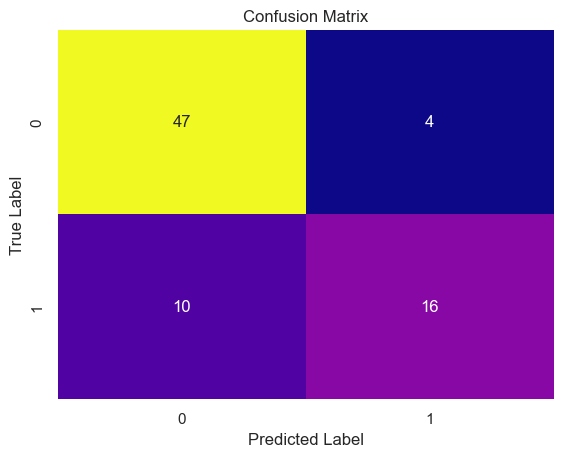

In [49]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

sn.heatmap(cm, annot=True, fmt="d", cmap="plasma", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [50]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        57
           1       0.62      0.80      0.70        20

    accuracy                           0.82        77
   macro avg       0.77      0.81      0.78        77
weighted avg       0.84      0.82      0.82        77



## Random Forest Algorithm and Grid SearchCV accuray score are 0.82 in Diabetes Dataset.